In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Build partial query URL
query_url = f"{url}&q="

In [4]:
# Create empty lists for variables
city_name=[]
lat = []
temperature=[]
cloudiness=[]
windspeed=[]
humidity=[]
count=1

# Print each city 
for city in cities:
    print(f"Processing Record number {count} | {city}")
    print(query_url + str(city))
    count+=1

Processing Record number 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8073bcc6f219c4a73ca15991d50d4a3&q=busselton
Processing Record number 2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8073bcc6f219c4a73ca15991d50d4a3&q=illoqqortoormiut
Processing Record number 3 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8073bcc6f219c4a73ca15991d50d4a3&q=bambous virieux
Processing Record number 4 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8073bcc6f219c4a73ca15991d50d4a3&q=umzimvubu
Processing Record number 5 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8073bcc6f219c4a73ca15991d50d4a3&q=hilo
Processing Record number 6 | aonla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8073bcc6f219c4a73ca15991d50d4a3&q=aonla
Processing Record number 7 | mar del plata
http://api.openweathermap.org/data/2.

In [5]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + str(city)).json()
    try:
        lat.append(response['coord']['lat'])
        city_name.append(response['name'])
        temperature.append(response['main']['temp'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
    except:
        "Null"

In [6]:
# Create dataframe to view collected city weather data
cityweather_df=pd.DataFrame({"City":city_name, "Cloudiness":cloudiness,"Humidity":humidity,"Lat":lat,"Max Temp":temperature,"Wind Speed":windspeed,})

cityweather_df.head()

,City,Cloudiness,Humidity,Lat,Max Temp,Wind Speed
0,Busselton,0,100,-33.64,63.39,18.92
1,Bambous Virieux,75,88,-20.34,80.60,2.24
2,Hilo,90,84,19.71,75.92,10.29
3,Aonla,0,87,28.27,49.44,5.61
4,Mar del Plata,0,47,-46.43,72.89,7.07


In [7]:
# Export city weather data to saved csv file
cityweather_export=cityweather_df.to_csv('weather_data.csv')

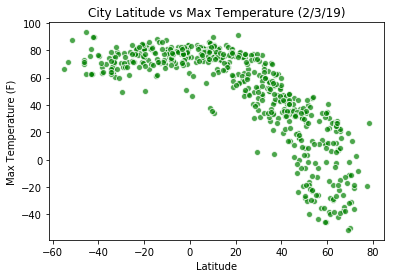

In [8]:
# City Latitude vs Max Temperature(F) scatter plot
x_axis=cityweather_df["Lat"]
y_axis=cityweather_df["Max Temp"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (2/3/19)")
plt.savefig('City_Latitude_vs_MaxTemp')
plt.grid(False)
plt.show()

# Observations of City Latitude vs Max Temperature

There is a clear general trend that shows higher maximum temperatures of cities that are near to and south of the equator. The further north a city is located from the equator shows a lower maximum temperature than the large majority of cities that are closer to the equator or south of the equator.

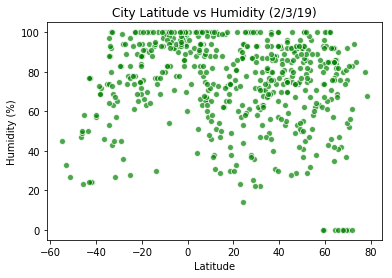

In [9]:
# City Latitude vs Percentage of Humidity scatter plot
x_axis=cityweather_df["Lat"]
y_axis=cityweather_df["Humidity"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2/3/19)")
plt.savefig("City_Latitude_vs_Humidity")
plt.grid(False)
plt.show()

# Observations of City Latitude vs Humidity

There is a somewhat even distribution of humidity levels across different latitudes in the Southern and Northern Hemisphere. Cities in the Southern Hemisphere have a larger concentration of a higher percentage of humidity than cities in the Northern Hemisphere. Several cities in the Northern Hemisphere, with latitudes closer to 60 and above, are the only instances of zero percent humidity. 

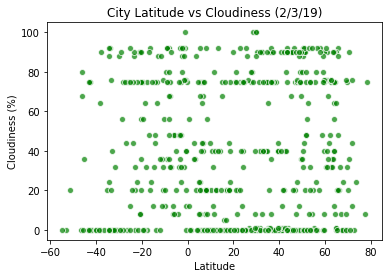

In [10]:
# City Latitude vs Percentage of Cloudiness scatter plot
x_axis=cityweather_df["Lat"]
y_axis=cityweather_df["Cloudiness"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2/3/19)")
plt.savefig("City_Latitude_vs_Cloudiness")
plt.grid(False)
plt.show()

# Observations of City Latitude vs Cloudiness

Similar to the observed data with the humidity data, there is a fairly even distribution of the percentage of cloudiness across latitudes.

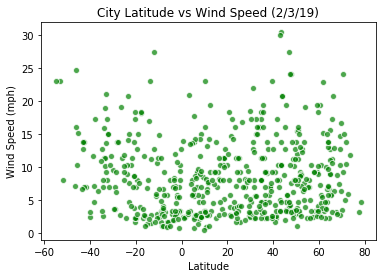

In [11]:
# City Latitude vs Wind Speed(mph)
x_axis=cityweather_df["Lat"]
y_axis=cityweather_df["Wind Speed"]
plt.scatter(x_axis,y_axis,marker ='o', facecolors ="green", edgecolors='white',alpha = 0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (2/3/19)")
plt.savefig("City_Latitude_vs_Wind_Speed")
plt.show()

# Observations of City Latitude vs Wind Speed

There is a fairly even distribution of wind speeds observed across all cities in these gathered data. Two observed cities at a latitude between 40 and 50 have wind speeds of close to 30 miles per hour. The highest wind speed observed in the Southern Hemisphere is less than 30 miles per hour, but more than 25 miles per hour. 